# Homework 1

In [1]:
A = ('A', 'B')
A + ('C',)

('A', 'B', 'C')

In [3]:
A = ('A', 'B')
A_list = list(A)
A_list.append('C')
A = tuple(A_list)
print(A)
print(type(A))

('A', 'B', 'C')
<class 'tuple'>


# Homework 2,3

In [6]:
import numpy as np

n = int(input())
val = 0
A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i,j] = val
        val += 1

A

 6


array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35.]])

In [7]:
A.reshape((-1,))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

# Homework 4

In [8]:
import cv2

img = cv2.imread('라쿤.jpg')

img.shape

(334, 448, 3)

In [11]:
img2 = np.expand_dims(img, axis=0)
img2.shape


(1, 334, 448, 3)

In [15]:
img3 = np.transpose(img2, (0,3,1,2))
img3.shape

(1, 3, 334, 448)

# Homework 5

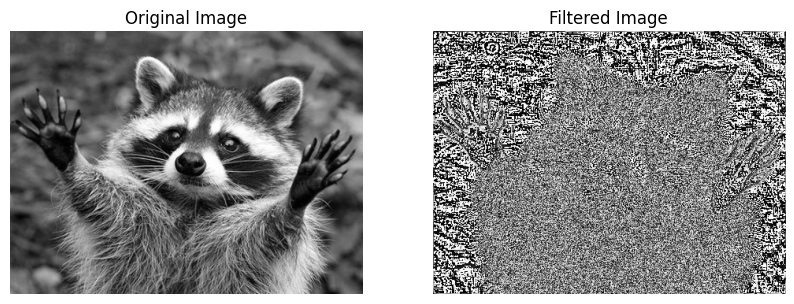

In [9]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기 (그레이스케일로 변환)
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)

# 커널 정의
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

# 이미지 크기
img_height, img_width = img.shape

# 커널 크기
kernel_size = kernel.shape[0]
pad = kernel_size // 2

# 패딩된 이미지 생성
padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

# 출력 이미지 생성
output = np.zeros_like(img)

# 필터 적용
for y in range(img_height):
    for x in range(img_width):
        # 관심 영역 추출
        roi = padded_img[y:y + kernel_size, x:x + kernel_size]
        # 커널과 관심 영역의 요소별 곱셈 후 합산
        output[y, x] = np.sum(roi * kernel)

# 값이 0-255 범위를 넘지 않도록 클리핑
output = np.clip(output, 0, 255)

# 결과 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.show()
